In [2]:
import pandas
from matplotlib import pyplot as plotter

In [3]:
sale_dataset_path = 'data/experience_sale_dataset'

KEY_experience = "YearsExperience"
KEY_sales = "HouseSales"

In [6]:
sale_dataset = pandas.read_csv(sale_dataset_path)

In [7]:
sale_dataset.head()

,YearsExperience,HouseSales
0,3.2,27
1,8.2,30
2,5.7,31
3,7.5,36
4,1.5,16


In [8]:
print(sale_dataset.shape)

(15, 2)


In [9]:
sale_dataset.describe()

,YearsExperience,HouseSales
count,15.000000,15.000000
mean,3.790000,22.666667
std,2.927346,9.802818
min,0.100000,6.000000
25%,1.250000,15.500000
50%,3.200000,22.000000
75%,6.225000,31.000000
max,8.500000,36.000000


(array([2., 2., 2., 0., 0., 2., 1., 1., 0., 0., 1., 1., 0., 1., 2.]),
 array([0.1 , 0.66, 1.22, 1.78, 2.34, 2.9 , 3.46, 4.02, 4.58, 5.14, 5.7 ,
        6.26, 6.82, 7.38, 7.94, 8.5 ]),
 <BarContainer object of 15 artists>)

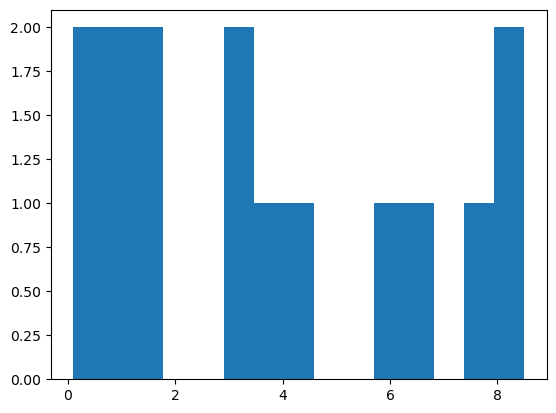

In [13]:
plotter.hist(sale_dataset[KEY_experience], bins = 15)

(array([1., 1., 0., 1., 1., 1., 2., 0., 1., 0., 1., 0., 4., 0., 2.]),
 array([ 6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26., 28., 30.,
        32., 34., 36.]),
 <BarContainer object of 15 artists>)

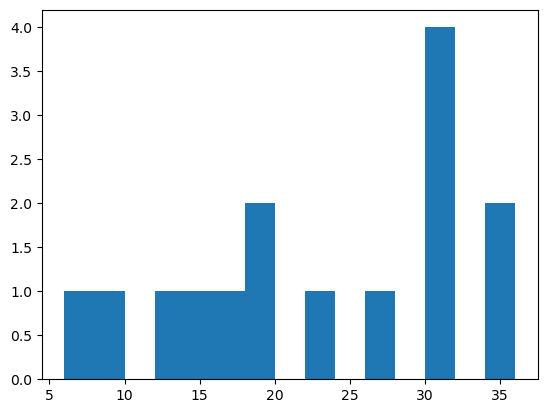

In [14]:
plotter.hist(sale_dataset[KEY_sales], bins = 15)

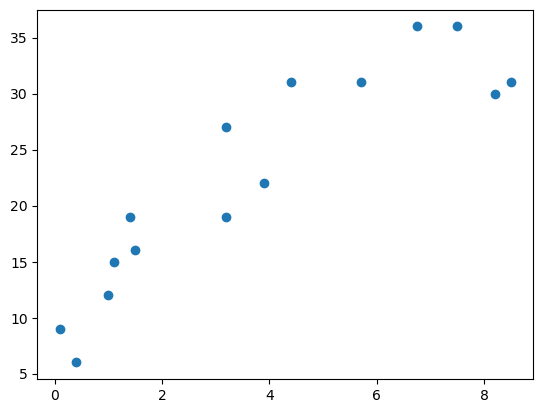

In [18]:
#lets see the data
plotter.scatter(x = sale_dataset[KEY_experience], y = sale_dataset[KEY_sales])

In [19]:
#now we are starting tries to get best model
from sklearn.linear_model import LinearRegression 
reg_model = LinearRegression().fit(sale_dataset[[KEY_experience]],
                                  sale_dataset[[KEY_sales]])

In [20]:
reg_model.score(sale_dataset[[KEY_experience]],
                sale_dataset[[KEY_sales]])

0.8137110174932514

In [21]:
reg_model.coef_

array([[3.02073001]])

In [22]:
reg_model.intercept_

array([11.21809993])

In [23]:
predictions = reg_model.predict(sale_dataset[[KEY_experience]])

In [24]:
residu = []
for x in range (len(predictions)):
    residu.append(sale_dataset[KEY_sales][x] - predictions[x])

In [25]:
from sklearn.metrics import r2_score
r2_score_linear = r2_score(sale_dataset[KEY_sales], predictions)

In [26]:
r2_score_linear

0.8137110174932514

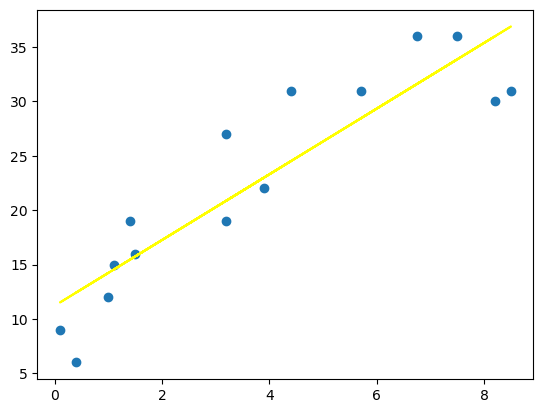

In [29]:
plotter.scatter(x = sale_dataset[KEY_experience],
                y = sale_dataset[KEY_sales])
plotter.plot(sale_dataset[KEY_experience], predictions, color = 'yellow')

In [30]:
residu

[array([6.11556404]),
 array([-5.98808601]),
 array([2.56373901]),
 array([2.126425]),
 array([0.25080506]),
 array([0.45909706]),
 array([4.3919725]),
 array([-5.89430501]),
 array([-1.88443596]),
 array([-0.99894697]),
 array([-2.52017293]),
 array([-2.23882994]),
 array([-6.42639193]),
 array([6.49068803]),
 array([3.55287806])]

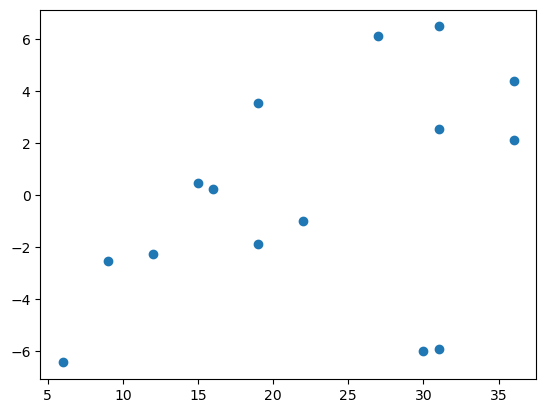

In [33]:
plotter.scatter (x= sale_dataset[KEY_sales],
                y = residu)
#this is residu graph

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_model = PolynomialFeatures(2)
transformed_data = poly_model.fit_transform(sale_dataset[[KEY_experience]],
                                  sale_dataset[[KEY_sales]])

In [36]:
transformed_data

array([[1.00000e+00, 3.20000e+00, 1.02400e+01],
       [1.00000e+00, 8.20000e+00, 6.72400e+01],
       [1.00000e+00, 5.70000e+00, 3.24900e+01],
       [1.00000e+00, 7.50000e+00, 5.62500e+01],
       [1.00000e+00, 1.50000e+00, 2.25000e+00],
       [1.00000e+00, 1.10000e+00, 1.21000e+00],
       [1.00000e+00, 6.75000e+00, 4.55625e+01],
       [1.00000e+00, 8.50000e+00, 7.22500e+01],
       [1.00000e+00, 3.20000e+00, 1.02400e+01],
       [1.00000e+00, 3.90000e+00, 1.52100e+01],
       [1.00000e+00, 1.00000e-01, 1.00000e-02],
       [1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.00000e+00, 4.00000e-01, 1.60000e-01],
       [1.00000e+00, 4.40000e+00, 1.93600e+01],
       [1.00000e+00, 1.40000e+00, 1.96000e+00]])

In [37]:
from sklearn.linear_model import LinearRegression
quadric_model  = LinearRegression().fit(transformed_data, sale_dataset[KEY_sales])